<a href="https://colab.research.google.com/github/ramyasri-2003/ML_EXPERIMENTS/blob/main/ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Decision tree :** A decision tree is a popular and intuitive machine learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences in a tree-like structure, where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome (or class label).


**ID3 algorithm :** The ID3 algorithm (Iterative Dichotomiser 3) is a popular algorithm used for creating decision trees in machine learning, primarily for classification tasks. It was developed by Ross Quinlan in 1986 and is known for its simplicity and effectiveness.

It uses the tree representation to solve a problem in which each node represents an attribute, each link represents a decision rule and each leaf represents an outcome( categorical or continuous value).

3. **Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.**

In [2]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the dataset
file_path = '/content/PlayTennis.csv'
df = pd.read_csv(file_path)

# Preview the data
print("Dataset:")
print(df.head())

Dataset:
    outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes


Accuracy of the model: 60.00%


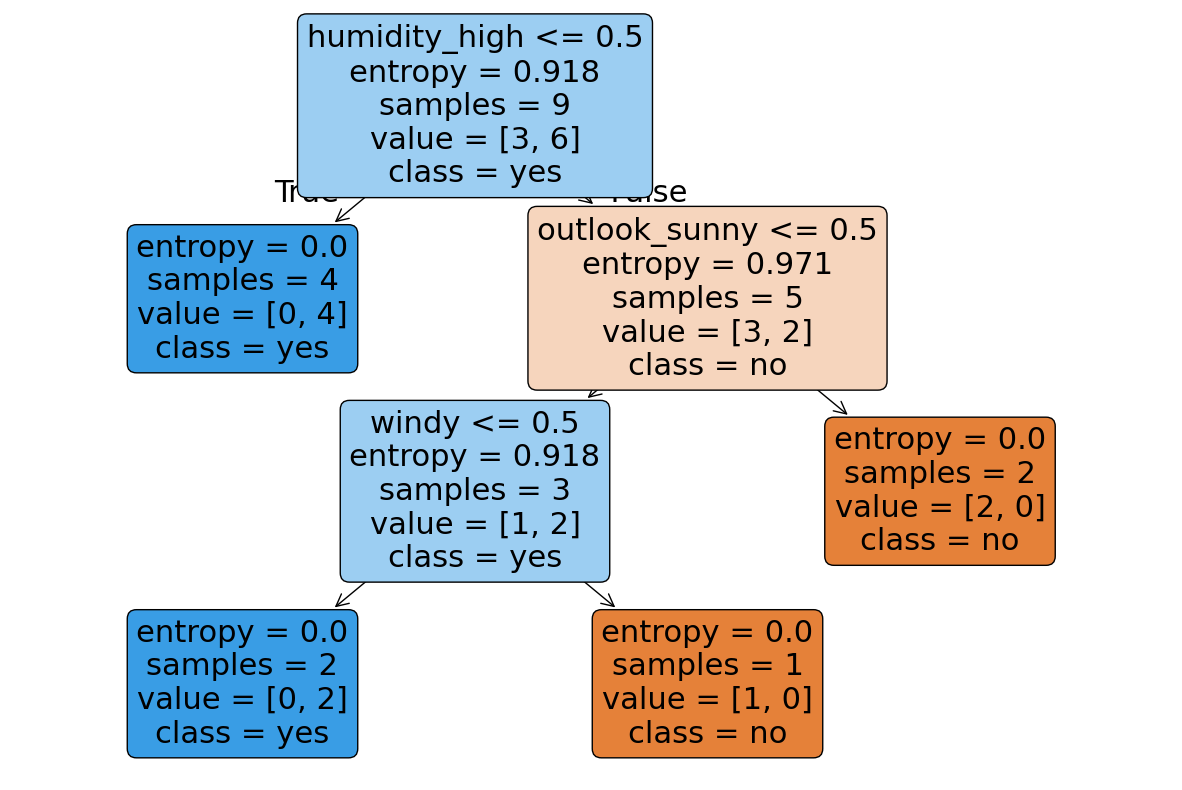

Predicted class for the new sample: yes


In [3]:
 #Prepare the data for training
# Assume that the target column is the last column ('PlayTennis') and the rest are features
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # The last column as the target

# Convert categorical features into numerical values using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree classifier using ID3 algorithm (entropy)
clf = DecisionTreeClassifier(criterion='entropy')

# Train the model
clf.fit(X_train, y_train)

# Test the model's accuracy on the test data
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

# Visualize the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True)
plt.show()

# Classify a new sample
# Example: {'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak'}
new_sample = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Hot'],
    'Humidity': ['High'],
    'Wind': ['Weak']
})

# Convert the new sample into the same format (one-hot encoding)
new_sample_encoded = pd.get_dummies(new_sample)
new_sample_encoded = new_sample_encoded.reindex(columns=X.columns, fill_value=0)

# Predict the class of the new sample
predicted_class = clf.predict(new_sample_encoded)
print(f"Predicted class for the new sample: {predicted_class[0]}")


1. **Load Dataset:** We load the PlayTennis.csv dataset using pandas to explore and process it.

2. **Separate Features and Target:**

X: This contains all the columns except the target column (PlayTennis), which represent the input features (Outlook, Temperature, Humidity, Wind).

y: This contains only the target column (PlayTennis), which tells whether to play tennis (Yes/No).

3.** Convert Categorical to Numerical (One-Hot Encoding):** Since decision trees require numerical data, we convert the categorical data (like "Sunny", "Rain", etc.) into numerical values using one-hot encoding. This creates new binary columns for each category.

4. **Split the Data:** We split the data into a training set (70%) to train the decision tree and a test set (30%) to evaluate its accuracy.

5.**Train the Decision Tree** (ID3 Algorithm): We create a decision tree using the ID3 algorithm, which splits the data based on entropy (a measure of information gain).

6. **Evaluate Model Accuracy:** The model's accuracy on the test set is printed to see how well it performs.

7. **Visualize the Decision Tree:** We visualize the tree to understand how it makes decisions based on the features.

8. **Classify a New Sample:** We create a new data sample (e.g., "Sunny", "Hot", "High", "Weak") and use the trained decision tree to predict whether to play tennis or not.